# Loan Application Status Prediction

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("E:\Anuradha\datatrained\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# fill the null values using mean:

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [9]:
# Descrive the data:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


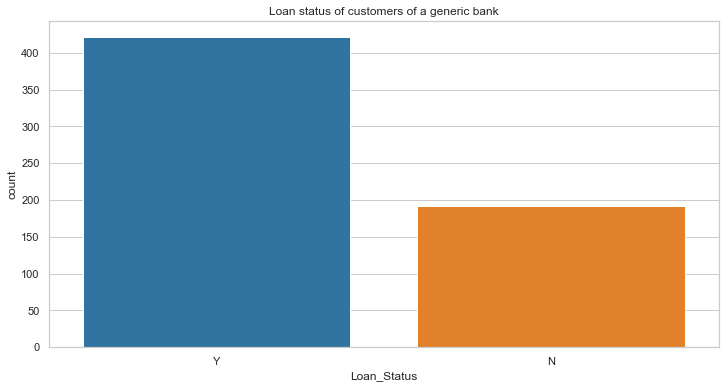

In [10]:
# Loan status of the poulation:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Loan_Status", data=df, palette="tab10").set(title='Loan status of customers of a generic bank')

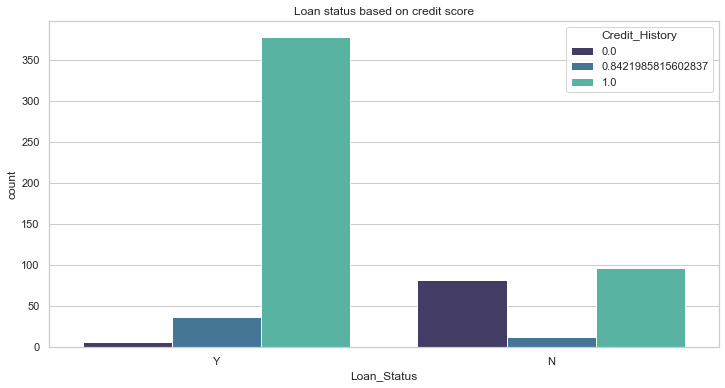

In [11]:
#  credit score / history has any relationship in getting loan or not:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Loan_Status", hue="Credit_History",data=df, palette="mako").set(title='Loan status based on credit score')

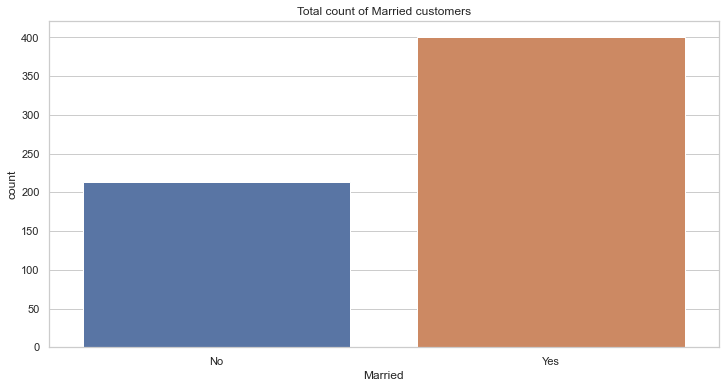

In [12]:
# Marital status of the customers:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Married", data=df).set(title='Total count of Married customers')

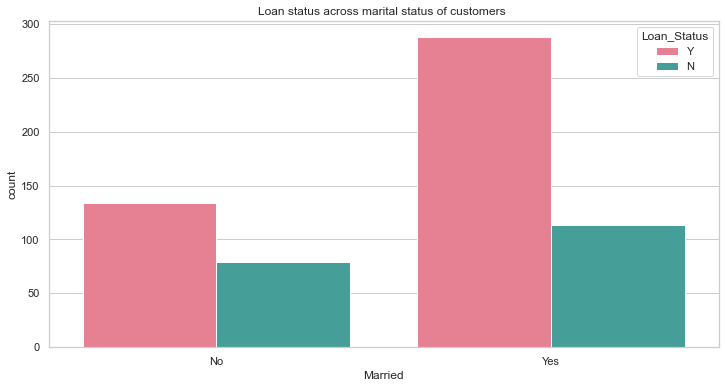

In [13]:
# Relationship between a person's marital status and loan sanction

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Married", hue="Loan_Status", data=df, palette="husl").set(title='Loan status across marital status of customers ')

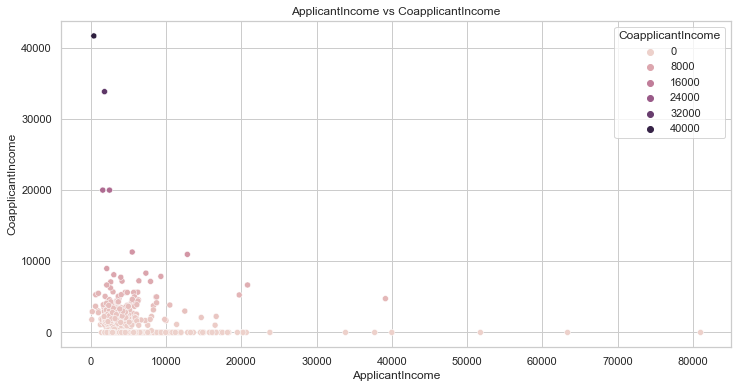

In [14]:
# Relation between ApplicantIncome and CoapplicantIncome

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="ApplicantIncome", y="CoapplicantIncome", hue="CoapplicantIncome").set(title='ApplicantIncome vs CoapplicantIncome')
plt.show()

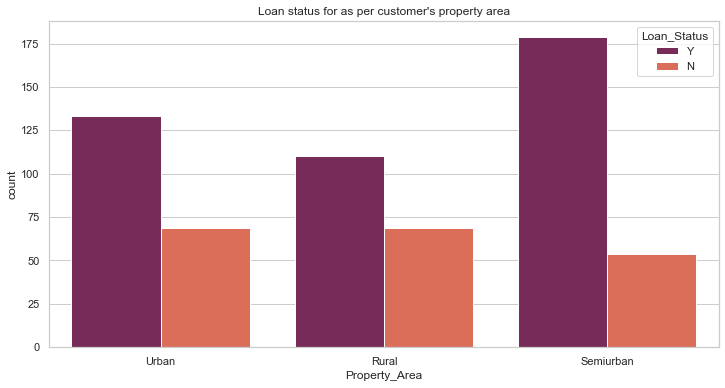

In [15]:
# Relationship between a sub geography and loan status:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Property_Area", hue="Loan_Status", data=df, palette="rocket").set(title="Loan status for as per customer's property area")

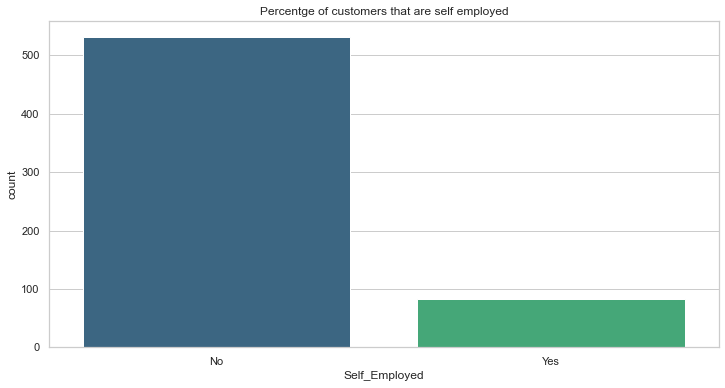

In [16]:
# Majority of the customers are not self employed they are salaried employes:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Self_Employed",data=df, palette="viridis").set(title='Percentge of customers that are self employed')

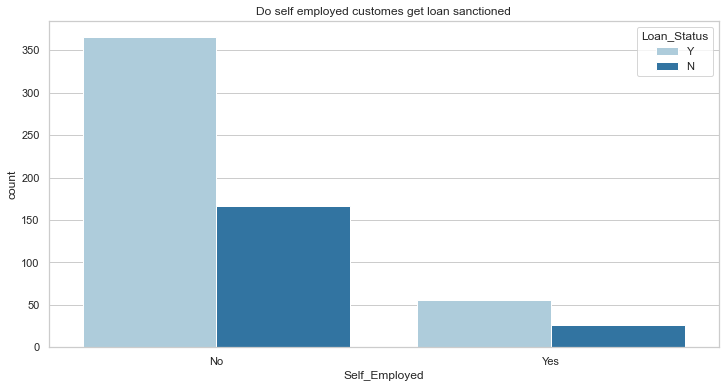

In [17]:
# Relationship between self employeed occupation type and loan sanction:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df, palette="Paired").set(title='Do self employed customes get loan sanctioned')

#### Being self-employed can affect your credit score and such customers are considered riskier, which in turn will impact your ability as an individual to borrow loan.

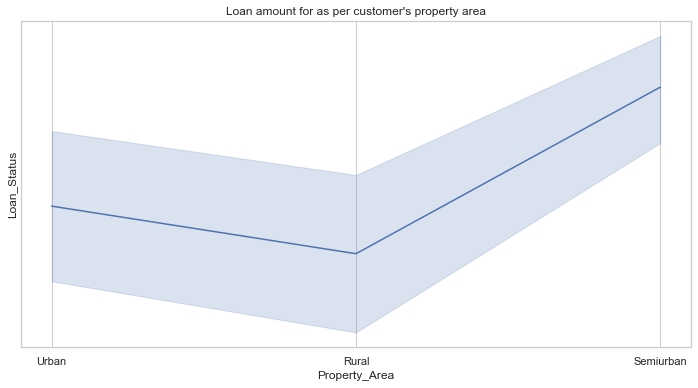

In [24]:
# semi urban area customer have a higher chance of getting loan status approved:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="Property_Area", y="Loan_Status", data=df).set(title= "Loan amount for as per customer's property area")
plt.show()

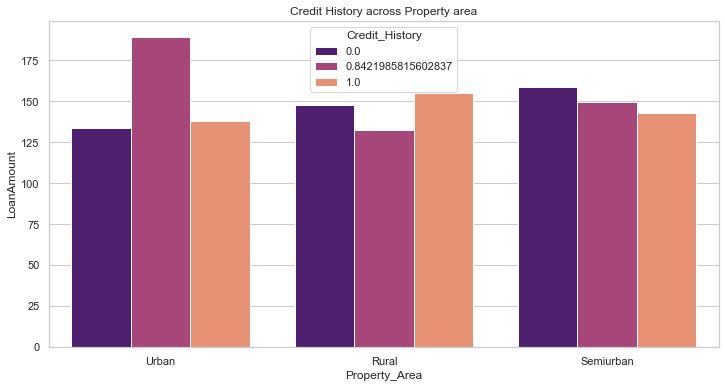

In [19]:
# credit score of customers across property area.
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Property_Area", y="LoanAmount", hue="Credit_History", data=df, palette="magma", orient="v", ci=None).set(title='Credit History across Property area')

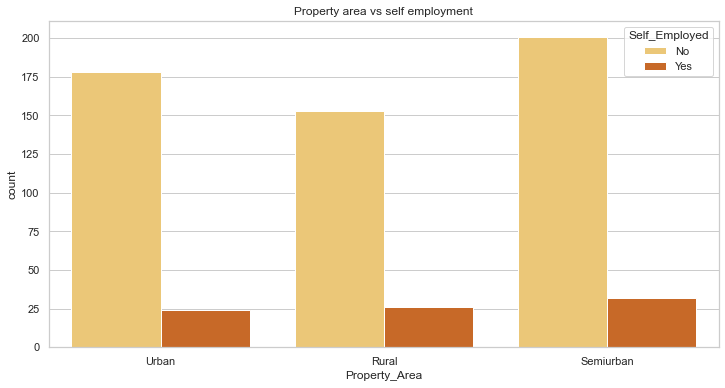

In [25]:
#Relationship between self emloyed and property area:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Property_Area", hue="Self_Employed", data=df, palette="YlOrBr").set(title='Property area vs self employment')

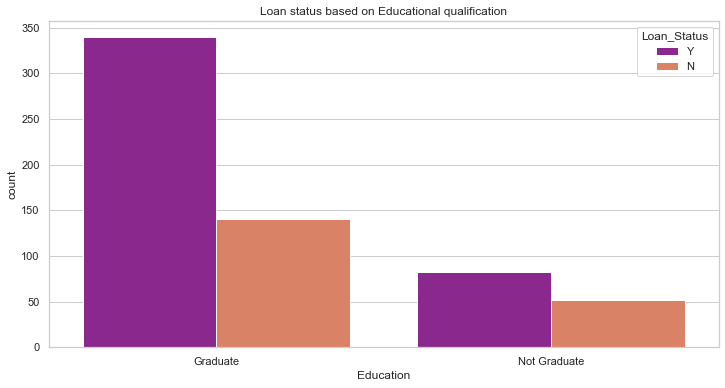

In [27]:
# Educational qualification impacts in getting loan:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Education", hue="Loan_Status", data=df, palette="plasma").set(title='Loan status based on Educational qualification')

[Text(0.5, 1.0, 'Loan amount term based on the income of applicant')]

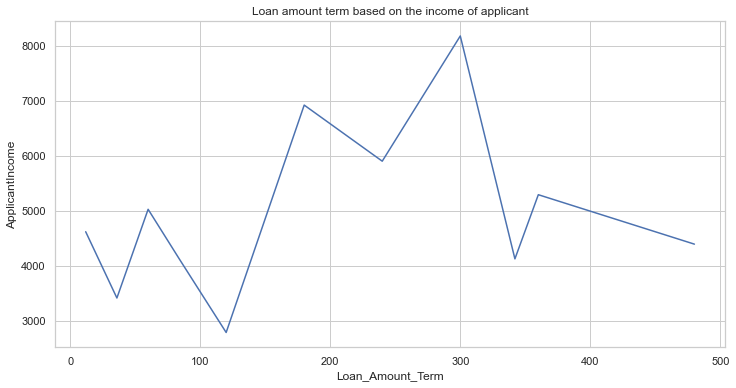

In [28]:
# loan amout term duration given based on applicant's income:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="Loan_Amount_Term", y="ApplicantIncome", ci=None).set(title='Loan amount term based on the income of applicant')

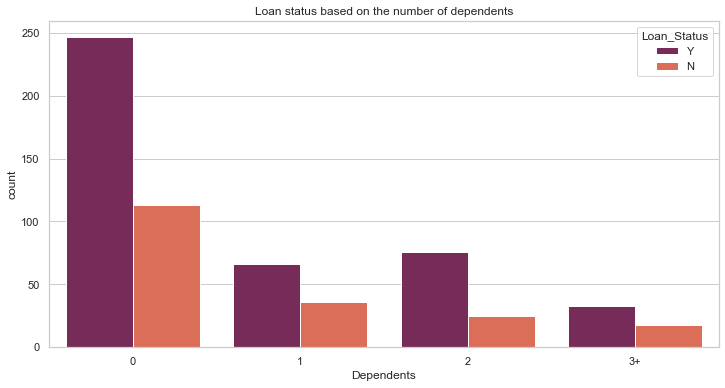

In [29]:
# Relationship between the loan status approval and the number of dependents:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Dependents", hue="Loan_Status", data=df, palette="rocket").set(title='Loan status based on the number of dependents')

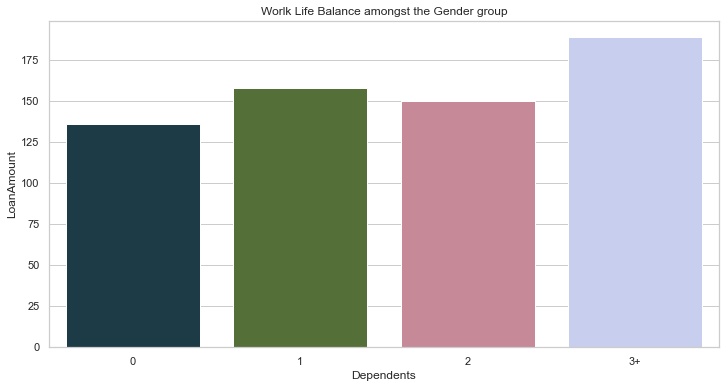

In [30]:
# Family member stands as a guaranteer or a co-applicant the loan status is likely to get approved.:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Dependents", y="LoanAmount", data=df, palette="cubehelix", orient="v", ci=None).set(title='Worlk Life Balance amongst the Gender group')

### Encoding

#### LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [32]:
# Encode the training dataset

df_new1 = lab_enc.fit_transform(df["Loan_ID"])
df_new2 = lab_enc.fit_transform(df["Gender"])
df_new3 = lab_enc.fit_transform(df["Married"])
df_new4 = lab_enc.fit_transform(df["Dependents"])
df_new5 = lab_enc.fit_transform(df["Education"])
df_new6 = lab_enc.fit_transform(df["Self_Employed"])
df_new7 = lab_enc.fit_transform(df["Property_Area"])
df_new8 = lab_enc.fit_transform(df["Loan_Status"])

# Encode the test dataset

df["Loan_ID"] = df_new1
df["Gender"] = df_new2
df["Married"] = df_new3
df["Dependents"] = df_new4
df["Education"] = df_new5
df["Self_Employed"] = df_new6
df["Property_Area"] = df_new7
df["Loan_Status"] = df_new8

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


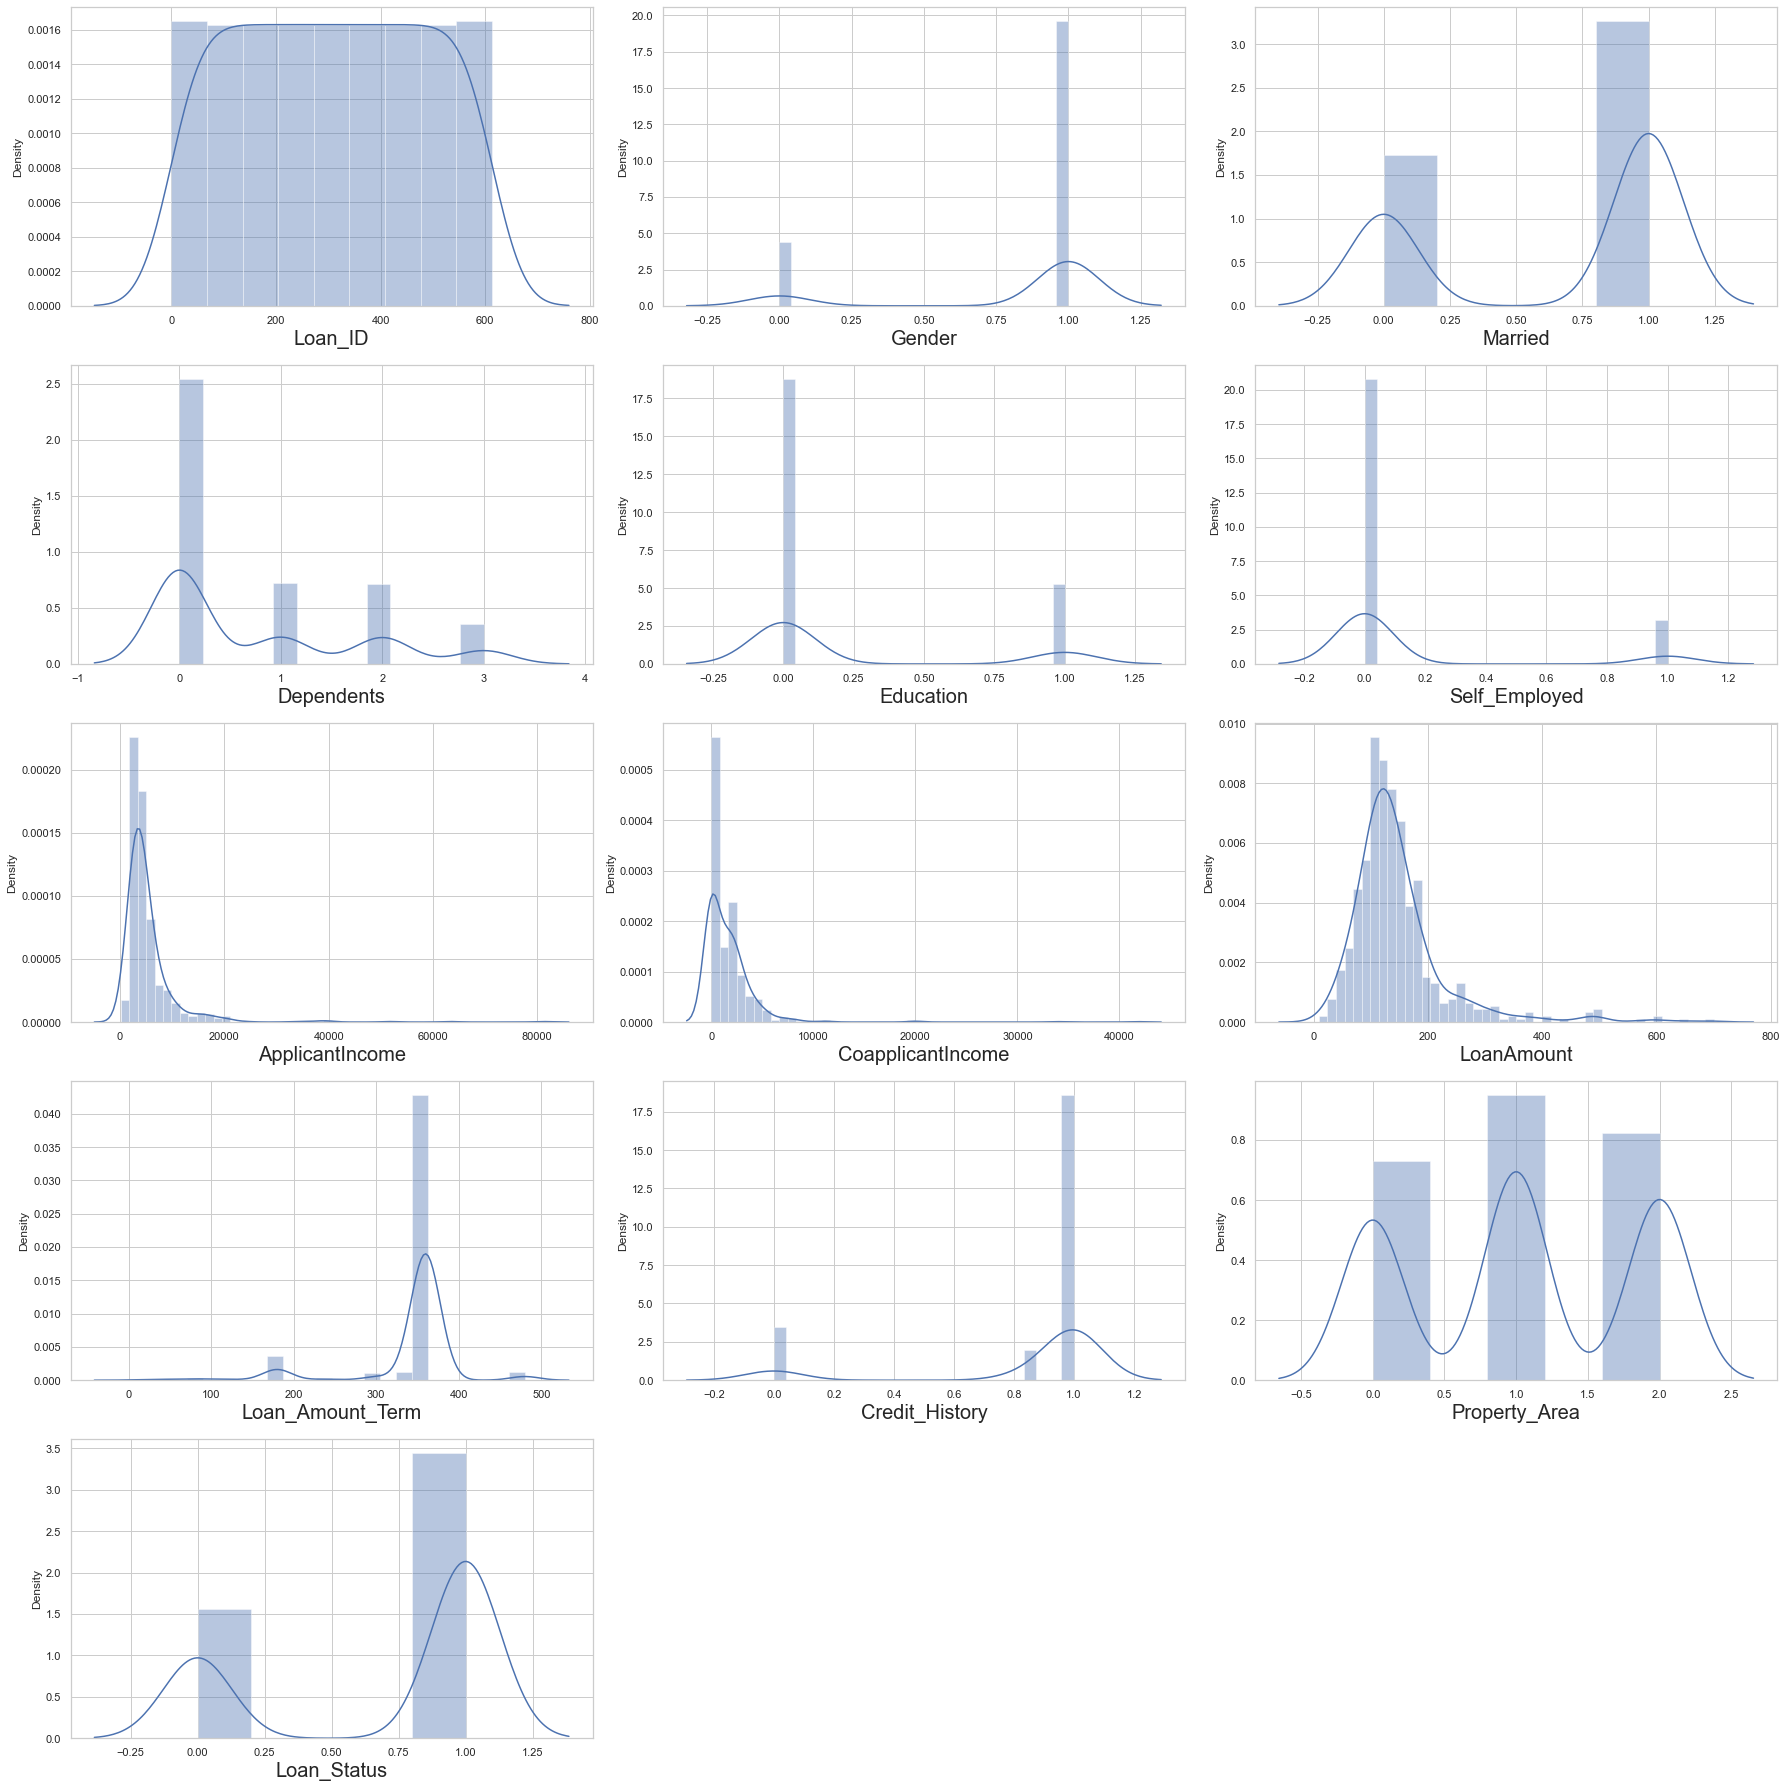

In [35]:
# Distribution of columns:

plt.figure(figsize=(25,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=13:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Z-score

In [36]:
from scipy.stats import zscore

z_score = zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,304.077990,0.814558,0.649913,0.719237,0.227036,0.126516,4666.020797,1420.807487,136.048644,347.604853,0.838646,1.031196,0.689775
std,176.726275,0.388993,0.477411,0.995229,0.419280,0.332719,2965.452652,1651.545352,56.193532,51.819095,0.353795,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,303.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1255.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,456.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


## Correlation 

### Credit History

In [37]:
corr_matrix = df.corr()
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.561857
Married              0.089026
CoapplicantIncome    0.045009
Property_Area        0.026507
Loan_ID              0.023530
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.005003
Loan_Amount_Term    -0.018144
Self_Employed       -0.026525
LoanAmount          -0.035289
Education           -0.092658
Name: Loan_Status, dtype: float64

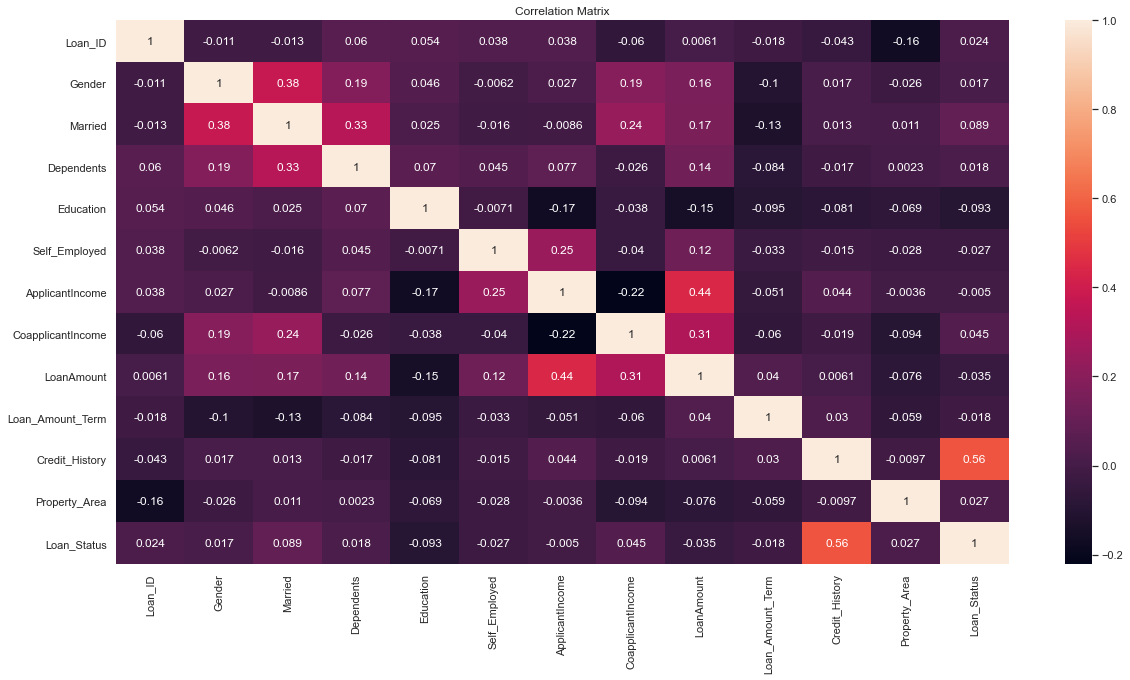

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

### Splitting dataset:

In [40]:
x = df.drop(columns = ["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [41]:
# skewness 

x.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

In [42]:
# skewness variable
features =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

### StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.72210857,  0.47713685, -1.36251079, ...,  0.23940793,
         0.45646138,  1.22747207],
       [-1.71644519,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138, -1.30652215],
       [-1.71078181,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138,  1.22747207],
       ...,
       [ 1.73821533,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 1.74387871,  0.47713685,  0.73393914, ...,  0.23940793,
         0.45646138,  1.22747207],
       [ 1.74954209, -2.09583477, -1.36251079, ...,  0.23940793,
        -2.37248823, -0.03952504]])

### VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.042881,Loan_ID
1,1.205872,Gender
2,1.341323,Married
3,1.176481,Dependents
4,1.075528,Education
5,1.072790,Self_Employed
6,1.632363,ApplicantIncome
7,1.458375,CoapplicantIncome
8,1.663128,LoanAmount
9,1.061829,Loan_Amount_Term


In [45]:
x.drop(['Loan_ID'], axis = 1, inplace=True)

In [46]:
df["Loan_Status"].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [48]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [49]:
# Train and Test data:

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

In [50]:
# DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.799163179916318
[[95 28]
 [20 96]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       123
           1       0.77      0.83      0.80       116

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



In [51]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8326359832635983
[[ 95  28]
 [ 12 104]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       123
           1       0.79      0.90      0.84       116

    accuracy                           0.83       239
   macro avg       0.84      0.83      0.83       239
weighted avg       0.84      0.83      0.83       239



In [54]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

extra_reg = ExtraTreesClassifier()
extra_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7782426778242678
[[92 31]
 [22 94]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       123
           1       0.75      0.81      0.78       116

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



In [55]:
# KNN


from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6443514644351465
[[77 46]
 [39 77]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.64       123
           1       0.63      0.66      0.64       116

    accuracy                           0.64       239
   macro avg       0.64      0.64      0.64       239
weighted avg       0.65      0.64      0.64       239



## Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(extra_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())


Cross Validation score of DecisionTreeRegressor model is: 0.7071964017991004
Cross Validation score of RandomForestRegressor model is: 0.7937781109445278
Cross Validation score of ExtraTreesRegressor model is: 0.7781709145427286
Cross Validation score of KNeighborsRegressor model is: 0.6186656671664168


### ROC & AOC

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [61]:
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rf.predict(x_test)))
print('ROC_AUC_SCORE_EXTRA_TREE :',roc_auc_score(y_test,extra_reg.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,k_neigh.predict(x_test)))

ROC_AUC_SCORE_DECISION_TREE : 0.7999719652368937
ROC_AUC_SCORE_RANDOM_FOREST : 0.8344547238575835
ROC_AUC_SCORE_EXTRA_TREE : 0.7877768432856742
ROC_AUC_SCORE_KNN : 0.6449046818054387


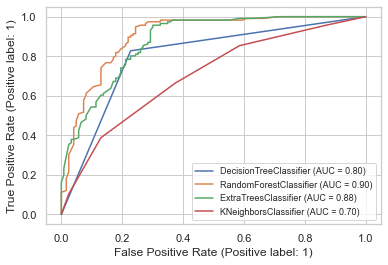

In [63]:
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)
plot_roc_curve(k_neigh, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':9},loc='lower right')
plt.show()

### Hyper Parameter Tuning


In [64]:
parameters = {"loss":["auto", "binary_crossentropy","categorical_crossentropy"],
              "max_iter":[20, 40, 60, 80, 100],
              "random_state":[30, 60, 90, 120, 150, 180, 200],
              "max_leaf_nodes":[1, 2, 3, 4, 5],
              "verbose":[0, 1, 2],
              "learning_rate":[0.1, 0.2, 0.3, 0.4, 0.5]      
            }

In [65]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Rebuild model:

In [66]:
param = {
    'bootstrap':[True],
    'n_estimators':(100,200,300),
    'n_jobs':[-1],
}

In [67]:
grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=param,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': (100, 200, 300),
                         'n_jobs': [-1]})

In [68]:
grid.best_params_

{'bootstrap': True, 'n_estimators': 100, 'n_jobs': -1}

In [69]:
rf_tuned=RandomForestClassifier(n_estimators=200,max_depth=2,n_jobs=-1)
rf_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, n_jobs=-1)

In [71]:
y_pred_rf = rf_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rf_tuned.score(x_train,y_train))
print('TESTING SCORE : ', rf_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_rf))

TRAINING SCORE :  0.7971274685816876
TESTING SCORE :  0.803347280334728
ACCURACY : 0.6443514644351465
*****************************
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       123
           1       0.73      0.95      0.82       116

    accuracy                           0.80       239
   macro avg       0.83      0.81      0.80       239
weighted avg       0.83      0.80      0.80       239



In [73]:
# Save the model

import joblib
joblib.dump(rf,"Loan_Status.pkl")

['Loan_Status.pkl']

### Load the Model:

In [74]:
model = joblib.load("Loan_Status.pkl")

In [75]:
prediction = model.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,0
2,0
3,1
4,0
...,...
234,0
235,0
236,1
237,0
